In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

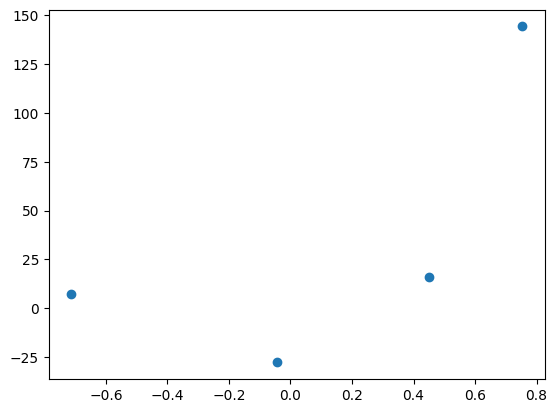

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [4]:
# ols
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [5]:
reg.coef_

array([78.35063668])

In [6]:
reg.intercept_


26.15963284313262

In [7]:
y_pred=((78*x)+0).reshape(4)

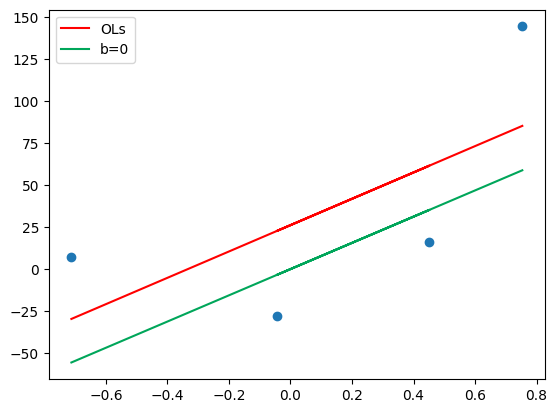

In [8]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLs')
plt.plot(x,y_pred,color='#00a65a',label='b=0')
plt.legend()
plt.show()

## GRADIENT DESCENT

In [9]:
m=78
b=0
loss_slope=-2*np.sum(y-m*x.ravel()-b)
loss_slope

-209.59171356600396

In [11]:
lr=0.1
step_size=loss_slope*lr
step_size

-20.959171356600397

In [12]:
b=b-step_size
b

20.959171356600397

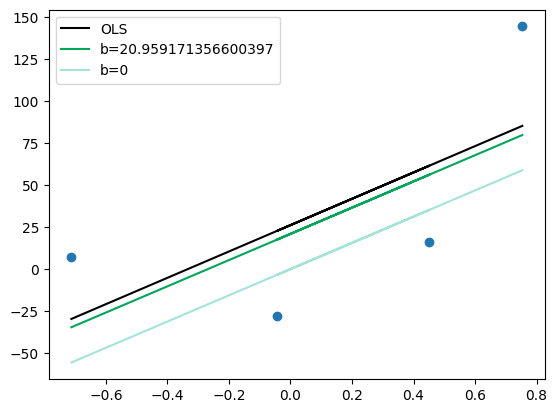

In [13]:
y_pred1=((78*x)+b).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='black',label='OLS')
plt.plot(x,y_pred1,color='#00a65a',label=f'b={b}')
plt.plot(x,y_pred,color='#A3E4D7',label=f'b={0}')
plt.legend()
plt.show()

In [21]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=10,random_state=13)

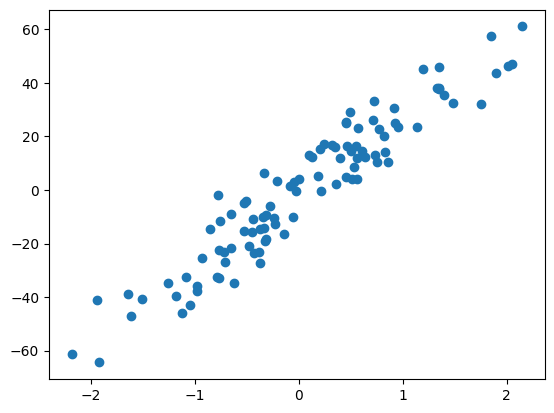

In [22]:
plt.scatter(x,y)

In [23]:
reg.fit(x,y)
print(reg.coef_)
print(reg.intercept_)

[27.71819977]
-1.1473722793384897


In [24]:
m=27.7181

In [28]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=0
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,x,y):
        for i in range(self.epochs):
            loss_slop_b=-2*np.sum(y-self.m*x.ravel()-self.b)
            loss_slop_m=-2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            self.b=self.b-self.lr*loss_slop_b
            self.m=self.m-self.lr*loss_slop_m
        print(self.b)
        print(self.m)
    def pred(self,x):
        return self.m*x+self.b

In [29]:
gd=GDRegressor(0.001,90)
gd.fit(x,y)

-1.1473735328731027
27.718203086521843


In [31]:
from sklearn.metrics import r2_score
r2_score(y,gd.pred(x))

0.9040006763949576